In [ ]:
import json
import re
import spacy
from typing import List, Tuple
import pickle


In [ ]:

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

def extract_question_word_and_mask(question):
    """
    Extract the question word/phrase and create a masked question by replacing it with <qw>.
    
    Args:
        question: The original question from SQuAD.
        
    Returns:
        Tuple: Tuple(masked question with <qw>, extracted question word/phrase)
    """
    doc = nlp(question)
    tokens = [token for token in doc]
    tokens_lower = [token.text.lower() for token in doc]
    
    # Check for single-word question words
    for idx, token in enumerate(tokens):
        token_lower = token.text.lower()
        if token.tag_ in ["WRB", "WDT", "WP", "WP$"] and not token_lower in ["that", "whatever"]:
            if token_lower == "how" and tokens[idx+1].tag_ in ["RB", "JJ"]:
                qw = f"how {tokens[idx+1].text.lower()}"
            else:
                qw = token_lower
                
            masked = re.sub(qw, "<qw>", " ".join(tokens_lower))

            return masked, qw
    
    # Fallback: if no question word is identified, return original question and "Unknown"
    return question, "Unknown"


In [ ]:

def process_squad(file_path):
    """
    Process SQuAD dataset to extract (question_with_masking, answer, question_word) tuples.
    
    Args:
        file_path: Path to the SQuAD JSON file (e.g., train-v1.1.json).
        
    Returns:
        List of tuples containing (masked question, answer, question word).
    """
    # Load SQuAD dataset
    with open(file_path, "r", encoding="utf-8") as f:
        squad_data = json.load(f)
    
    qa_pairs = []
    

    for article in squad_data["data"]:
        for paragraph in article["paragraphs"]:
            for qa in paragraph["qas"]:
                question = qa["question"].strip()
                # Use the first answer (SQUAD have multiple answers)
                answer = qa["answers"][0]["text"].strip() if qa["answers"] else ""
                
                masked_question, question_word = extract_question_word_and_mask(question)
                
                qa_pairs.append((masked_question, answer, question_word))
    
    return qa_pairs


In [ ]:
#SHOW EXAMPLES
squad_file = "data/train-v1.1.json"

qa_pairs = process_squad(squad_file) # Process the dataset

for i, (masked_question, answer, question_word) in enumerate(qa_pairs[:5]):
    print(f"Tuple {i+1}:")
    print(f"Masked Question: {masked_question}")
    print(f"Answer: {answer}")
    print(f"Question Word: {question_word}\n")

In [ ]:
#show qw occurence
qw = [x[2] for x in qa_pairs if "<qw>" in x[0]]
print(len(
    qw))
print(len(set(
    qw)))
{val: 
qw.count(val) for val in set(a)}

86030
89


{'how toxic': 1,
 'how widespread': 1,
 'how abundant': 1,
 'how easily': 1,
 'how hot': 3,
 'how small': 2,
 'when': 5697,
 'how present': 1,
 'how quickly': 3,
 'how severe': 2,
 'how heavy': 1,
 'how close': 10,
 'how serious': 1,
 'how': 1981,
 'how soon': 4,
 'why': 1223,
 'how much': 1104,
 'how diverse': 1,
 'how bad': 3,
 'how big': 34,
 'whom': 345,
 'how tall': 35,
 'how valuable': 1,
 'how important': 4,
 'how economically': 1,
 'how prevalent': 2,
 'how fast': 14,
 'how popular': 3,
 'how young': 1,
 'how related': 1,
 'how old': 109,
 'how near': 1,
 'how strong': 3,
 'how late': 1,
 'how else': 5,
 'how different': 1,
 'how badly': 1,
 'how similar': 4,
 'what': 50472,
 'how available': 1,
 'how clear': 1,
 'how recently': 1,
 'how poor': 1,
 'which': 6083,
 'how well': 3,
 'who': 8806,
 'how rare': 1,
 'how successful': 1,
 'how large': 69,
 'how light': 1,
 'how avid': 1,
 'how simple': 1,
 'how frequently': 1,
 'how wide': 4,
 'how expensive': 2,
 'how selective': 1,
 

In [ ]:
#remove unkown qw
for idx, qa in enumerate(qa_pairs):
    if qa[2] == "Unknown":
        qa_pairs.pop(idx)
a = [x for x in qa_pairs if "<qw>" not in x[0]]
print(len(a))
set(a)

0


set()

In [ ]:
#remove those with too few samples
qw_list = [x[2] for x in qa_pairs if "<qw>" in x[0]]
qw_set = set(qw_list)
qw_count = {val:qw_list.count(val) for val in qw_set}
for idx, qa in enumerate(qa_pairs):
    if qw_count[qa[2]]<150:
        qa_pairs.pop(idx)

In [ ]:
with open("data/train_processed.pkl", "wb") as f:#save
    pickle.dump(qa_pairs, f)


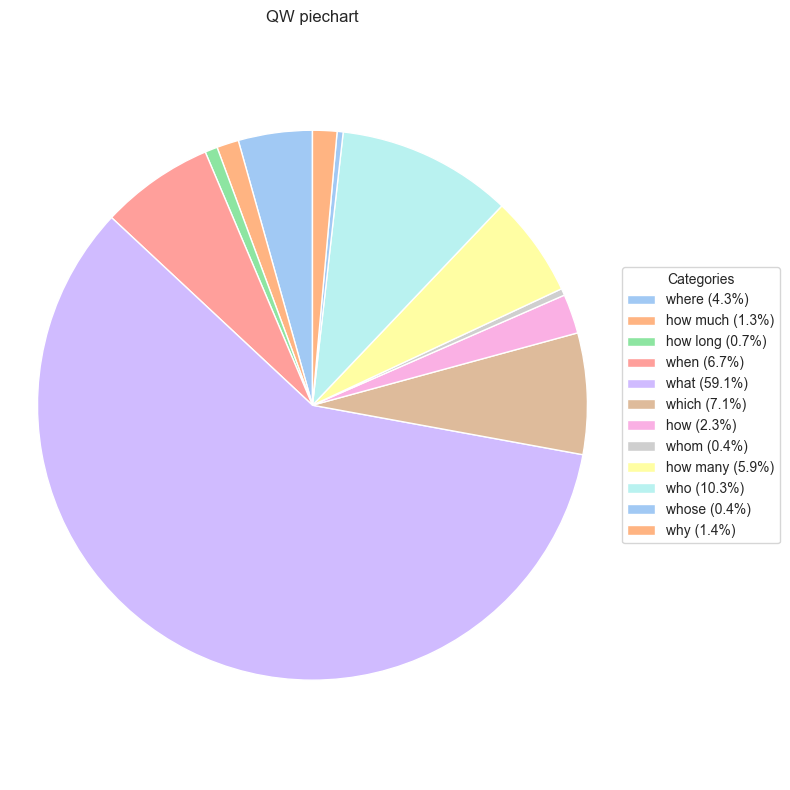

In [ ]:
#plot piechart

import seaborn as sns
import matplotlib.pyplot as plt

counts = {"Category1": 10, "Category2": 20, "Category3": 15}

sns.set_style("whitegrid")

labels = list(qw_counts.keys())
values = list(qw_counts.values())

total = sum(values)
percentages = [(value / total * 100) for value in values]
legend_labels = [f"{label} ({pct:.1f}%)" for label, pct in zip(labels, percentages)]

plt.figure(figsize=(8, 8)) 
wedges, _ = plt.pie(
    values,
    labels=None, 
    startangle=90,
    colors=sns.color_palette("pastel")
)

plt.legend(wedges, legend_labels, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title("QW piechart")
plt.axis('equal') 

plt.tight_layout()

plt.show()